# Data Wrangling Group Project

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6     v dplyr   1.0.9
v tibble  3.1.8     v stringr 1.4.1
v tidyr   1.2.0     v forcats 0.5.1
v purrr   0.3.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Rows: 51903 Columns: 72
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (20): crashDirectionDescription, crashFinancialYear, crashLocation1, cra...
dbl (50): X, Y, OBJECTID, advisorySpeed, areaUnitID, bicycle, bridge, bus, c...
lgl  (2): crashRoadSideRoad, intersection

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 51,903
Columns: 72
$ X                         <dbl> 1569263, 1554448, 1572260, 1573557, 1573407,~
$ Y                         <dbl> 5177269, 5181256, 5180996, 5180808, 5180049,~
$ OBJECTID                  <dbl> 2, 6, 8, 16, 22, 27, 30, 36, 37, 38, 44, 46,~
$ advisorySpeed             <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ~
$ areaUnitID                <dbl> 595000, 587821, 593300, 593600, 593600, 5921~
$ bicycle                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ bridge                    <dbl> NA, 0, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA~
$ bus                       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ carStationWagon           <dbl> 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 0, 1,~
$ cliffBank                 <dbl> NA, 0, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA~
$ crashDirectionDescription <chr> "East", "West", "North", "Null", "Null", "No~
$ crashFinancialYear        <chr> "1999/2000", "1999/2000", "2000/2001", "2000~
$ crashLocation

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
"'length(x) = 3 > 1' in coercion to 'logical(1)'"


,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,logical.mean,logical.count,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,crashDirectionDescription,0,1.00000000,4,5,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,crashFinancialYear,0,1.00000000,9,9,0,24,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,crashLocation1,0,1.00000000,4,56,0,3145,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,character,crashLocation2,55,0.99894033,4,43,0,4204,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,character,crashSeverity,0,1.00000000,11,16,0,4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,character,crashSHDescription,0,1.00000000,2,7,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,character,directionRoleDescription,2,0.99996147,4,5,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,character,flatHill,0,1.00000000,4,9,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,character,holiday,49341,0.04936131,6,18,0,4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Warning message:
"`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead."


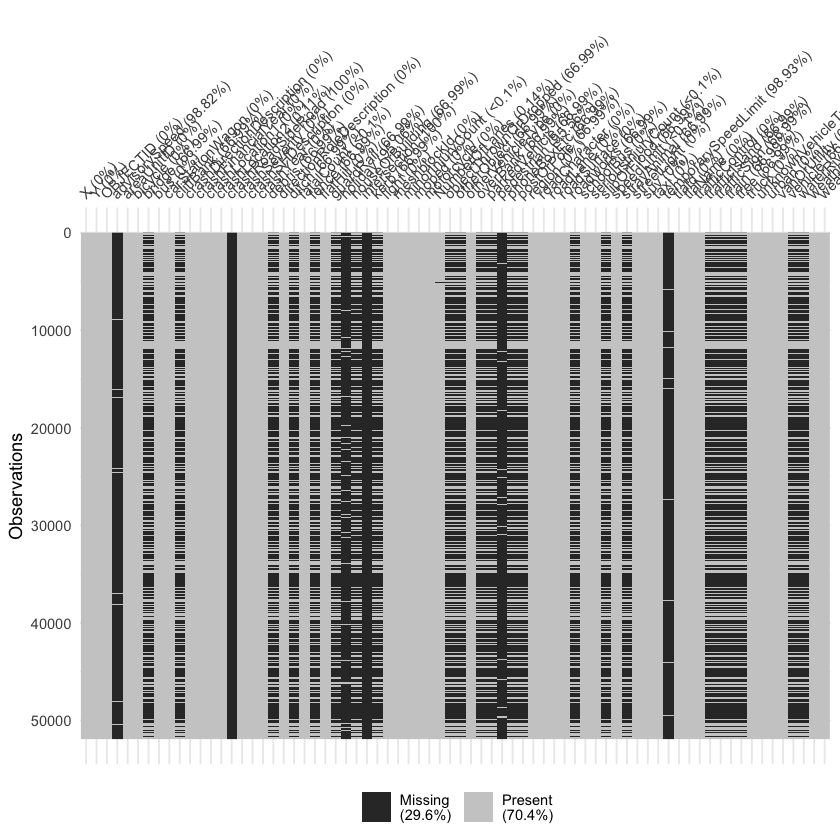

In [1]:
#install.packages("tidyverse")
#install.packages("skimr")
#install.packages("readr")
#install.packages("visdat")
library(skimr)
library(readr)
library(visdat)
library(tidyverse)

crash_df <- read_csv("https://raw.githubusercontent.com/zelta1990/STAT422-Group-Project/main/Crash_data_chch.csv") #Load Crash_data_chch.csv as a dataframe
crash_df %>% glimpse() #check column types
crash_df %>% skim() #quick data summary
crash_df %>% vis_miss(large_data_size = 9e+07)#Visualise missing values

In [ ]:
#    Title: NZTM-WGS84(NZGD2000) converter
#    Author: mkennedy
#    Date: Feb 16, 2012 at 2:32
#    Availability: https://gis.stackexchange.com/questions/20389/converting-nzmg-or-nztm-to-latitude-longitude-for-use-with-r-map-library/20401#20401

#install.packages("proj4")
library(proj4)
get_lat_lon <- function(x,y)
{
    proj4string <- "+proj=tmerc +lat_0=0 +lon_0=173 +k=0.9996 +x_0=1600000 +y_0=10000000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
    #proj4string <- "+proj=tmerc +lat_0=0.0 +lon_0=173.0 +k=0.9996 +x_0=1600000.0 +y_0=10000000.0 +datum=WGS84 +units=m"
    # Source data
    xy <- data.frame(x, y)

    # Transformed data
    pj <- project(xy, proj4string, inverse=TRUE)
    latlon <- data.frame(lat=pj$y, lon=pj$x)
    return(latlon)
}
lat_lon <- get_lat_lon(1577339,5182974)
lat_lon
